In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import os

In [124]:
results_path = '../results2/'
results_paths = os.listdir(results_path)
results_list = [pd.read_csv(results_path + result) for result in results_paths]
all_results = pd.concat(results_list)

In [125]:
all_results.columns

Index(['total', 'correct', 'accuracy', 'true_positives', 'true_negatives',
       'false_positives', 'false_negatives', 'classes', 'per_class_recall',
       'per_class_precision', 'per_class_specificity', 'macro_recall',
       'macro_precision', 'macro_specificity', 'macro_f_measure_2',
       'macro_f_measure_1', 'macro_f_measure_0.5', 'k_folds', 'ntree', 'm',
       'execution_time', 'timestamp', 'seed'],
      dtype='object')

In [126]:
def data_name(path):
    if 'credit' in path: return "German Credit"
    if 'wine' in path: return "Wine"
    if 'spambase' in path: return "Spam E-mail"
    if 'phpOkU53r' in path: return "Vertebral Column"
    return path
    
def attr_name(name):
    if 'ntree' in name: return "Number of Trees"
    if 'm' == name: return 'M param'
    if 'k_folds' in name: return 'Number of k-folds'
    return name

def result_name(name):
    if 'accuracy' in name: return name.capitalize()
    if 'macro_f_measure_1' in name or 'macro-f-measure-1' in name: return 'M-F1'
    if 'macro_recall' in name: return 'M-Recall'
    if 'macro_precision' in name: return 'M-Precision'
    return name

## All results mean scores

Text(0.5, 1.0, 'Experiments mean scores per number of trees')

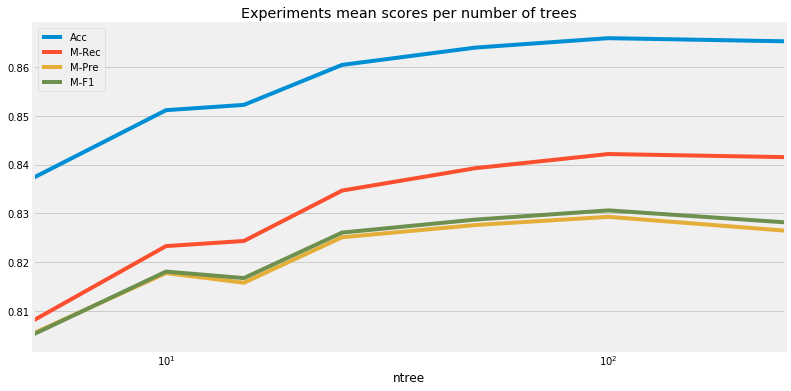

In [127]:
r = all_results.groupby('ntree').mean()
d = ['total','k_folds', 'm', 'execution_time', 'timestamp', 'seed', 'correct', 'macro_specificity', 'macro_f_measure_2', 'macro_f_measure_0.5']
t = r.drop(d, axis=1)
t.plot(kind='line', figsize=(12,6), logx=True)
plt.legend(['Acc', 'M-Rec', 'M-Pre', 'M-F1'])
plt.grid(axis='x')
plt.title('Experiments mean scores per number of trees')

In [128]:
r = all_results.groupby('ntree').var()
d = ['total','k_folds', 'm', 'execution_time', 'timestamp', 'seed', 'correct', 'macro_specificity', 'macro_f_measure_2', 'macro_f_measure_0.5']
t = r.drop(d, axis=1)
t

,accuracy,macro_recall,macro_precision,macro_f_measure_1
ntree,,,,
5,0.011113,0.018118,0.019983,0.019371
10,0.010613,0.017042,0.019981,0.019160
15,0.010422,0.016550,0.020266,0.019322
25,0.010107,0.015725,0.019921,0.018883
50,0.010073,0.015365,0.020238,0.019136
100,0.009910,0.014870,0.020053,0.018895
250,0.010094,0.014930,0.020702,0.019468


## Scores per Dataset

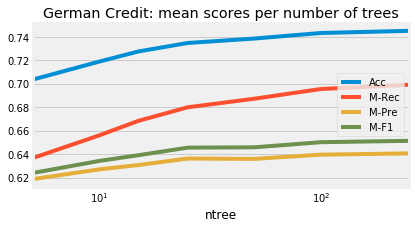

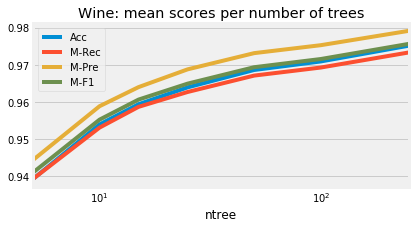

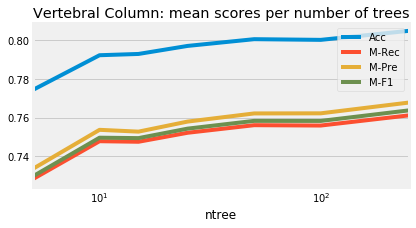

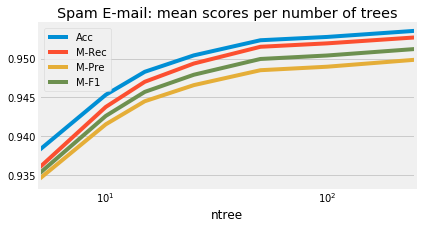

In [137]:
d = ['total','k_folds', 'm', 'execution_time', 'timestamp', 'seed', 'correct', 'macro_specificity', 'macro_f_measure_2', 'macro_f_measure_0.5']

for results, path in zip(results_list, results_paths):
    r = results.groupby('ntree').mean()
    t = r.drop(d, axis=1)
    t.plot(kind='line', figsize=(6,3), logx=True)
    plt.legend(['Acc', 'M-Rec', 'M-Pre', 'M-F1'])
    plt.grid(axis='x')
    plt.title(f'{data_name(path)}: mean scores per number of trees')